In [ ]:
# App Recommendation

In [84]:
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import datasets,linear_model
from re import sub
from decimal import Decimal

In [85]:
store = {}
df = pd.read_csv('UserReview.csv')

df = df[df['Translated_Review'].notna()]
index_names = df[ df['Translated_Review'] == "nan" ].index
df.drop(index_names, inplace = True)

for index, row in df.iterrows():
    if row['App'] in store:
        store[row['App']]+=row['Translated_Review']
    else:
        store[row['App']]=row['Translated_Review']

list_reviews = []
for key, value in store.items():
    list_reviews.append([key,value])

data_reviews = pd.DataFrame(list_reviews,columns=['App','Translated_Review'])
data_reviews.set_index('App', inplace=True)

In [86]:
data = pd.read_csv('Review.csv',index_col = "App")
data["App Name"]=data.index

#removing duplicate entries
data.drop_duplicates(subset=['App Name'], keep='first',inplace = True)

data.Type = pd.Categorical(data.Type)
data.Type=data.Type.astype('category').cat.codes

print(data.head())

               Category  Rating  Reviews   Size     Installs  Type  Price  \
App                                                                         
Telegram      Messaging     3.7       20  70.6M      10,000+     0      0   
WhatsApp      Messaging     3.2       12    19M     500,000+     0      0   
Instagram  Social Media     3.3       12    14M   5,000,000+     0      0   
Facebook   Social Media     3.5       15   8.7M  50,000,000+     0      0   
Twitter    Social Media     3.5       15    25M     100,000+     0      0   

          Content Rating                                             Genres  \
App                                                                           
Telegram        Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
WhatsApp        Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
Instagram       Everyone                            Business; Social Media;   
Facebook        Everyone                            Business; Soc

In [87]:
app_name = "YouTube"
num_rec = 3

In [88]:
matching_apps_index=data["App Name"].str.contains(app_name, case= False)
matching_apps = data[matching_apps_index]

In [89]:
if len(matching_apps)==0:
    print("NO SUCH APP")
else:
    given_app=matching_apps.iloc[0,:]
    print("Recommending for app: ",given_app[12])
    print(given_app)

Recommending for app:  YouTube
Category                                  Entertainment
Rating                                              3.2
Reviews                                              12
Size                                                19M
Installs                                     1,000,000+
Type                                                  0
Price                                                 0
Content Rating                                 Everyone
Genres            Entertainment; Editors; Video Player;
Last Updated                                       2023
Current Ver                                       1.1.8
Android Ver                                4.0.3 and up
App Name                                        YouTube
Name: YouTube, dtype: object


In [90]:
data = data.loc[data['Category'] == given_app[0]]

In [91]:
tf = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = pd.DataFrame((tf.fit_transform(data.index)).toarray(),index=data.index)
matrix = cosine_similarity(tfidf_matrix,[tfidf_matrix.loc[given_app[12]]])

In [92]:
tf = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = pd.DataFrame((tf.fit_transform(data_reviews['Translated_Review'])).toarray(),index=data_reviews.index)

reviews_similarity = {}
for index, row in data.iterrows():
    reviews_similarity[index]=0

if given_app[12] in data_reviews.index:
    matrix_reviews = cosine_similarity(tfidf_matrix,[tfidf_matrix.loc[given_app[12]]])
    for i in range(0,len(matrix_reviews)):
        reviews_similarity[data_reviews.index[i]]=matrix_reviews[i][0]
else:
    print("No reviews found")

In [93]:
list_similarities = []

for i in range(0,len(matrix)):
    list_similarities.append([matrix[i][0]+reviews_similarity[data.index[i]],data.index[i],matrix[i][0],reviews_similarity[data.index[i]]])
list_similarities.sort(reverse = True)

In [94]:
final_simi = {}
for entry in list_similarities:
    if entry[0] !=0 and entry[1] != given_app[12]:
        final_simi[entry[1]]=entry[0]

In [95]:
buckets = []

ranges = []
ranges.append([1.5,2.0])
ranges.append([1.0,1.5])
ranges.append([0.6,1.0])
ranges.append([0.4,0.6])
ranges.append([0.3,0.4])
ranges.append([0.25,0.3])
ranges.append([0.2,0.25])
ranges.append([0.15,0.2])
ranges.append([0.1,0.15])
ranges.append([0.075,0.1])

In [96]:
low = 1.5
high = 2.0
temp= []
for entry in list_similarities:
    if entry[0] <= high and entry[0] > low:
        temp.append(entry[1])
buckets.append(temp)

In [97]:
for ran in ranges:
    low = ran[0]
    high = ran[1]
    temp= []
    for entry in list_similarities:
        if entry[0] <= high and entry[0] > low:
            temp.append(entry[1])
    buckets.append(temp)

In [98]:
final_ans=[]
final_simi[given_app[12]]=2.0
for entry in buckets:
    if len(entry) > 0:
        index_names=entry
        data_temp=data.loc[index_names]
        final_data = data_temp.sort_values(by=['Rating'], ascending=False)
        for index,row in final_data.iterrows():
            if index!=given_app[12]:
                final_ans.append([index,row['Rating'],final_simi[index]])

In [99]:
if len(final_ans)==0:
    print("No Good recommendations")
else:
    print("App,\t Rating,\t Similarity_measure")
    for i in range(0,min(num_rec,len(final_ans))):
        print(final_ans[i][0],'\t',final_ans[i][1],'\t',round(final_ans[i][2],3))

App,	 Rating,	 Similarity_measure
Amazon Prime Video 	 3.5 	 0.191
Netflix 	 3.5 	 0.162
Disney+ 	 3.6 	 0.114


In [100]:
# App is True or False

In [101]:
df1 = pd.read_csv('Review.csv')

In [102]:
df1.head()

App      Category  Rating  Reviews   Size     Installs  Type  Price  \
0   Telegram     Messaging     3.7       20  70.6M      10,000+  Free      0   
1   WhatsApp     Messaging     3.2       12    19M     500,000+  Free      0   
2  Instagram  Social Media     3.3       12    14M   5,000,000+  Free      0   
3   Facebook  Social Media     3.5       15   8.7M  50,000,000+  Free      0   
4    Twitter  Social Media     3.5       15    25M     100,000+  Free      0   

  Content Rating                                             Genres  \
0       Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
1       Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
2       Everyone                            Business; Social Media;   
3       Everyone                            Business; Social Media;   
4       Everyone        Business; News and Magazines; Social Media;   

   Last Updated Current Ver   Android Ver  
0          2023       1.0.1  4.0.3 and up  
1          2023       1.0.0  4.0.3 and up  
2          2023       2.0.0  4.0.3 and up  
3          2023       1.2.4  4.0.3 and up  
4          2023       2.2.4  4.0.3 and up

<AxesSubplot:xlabel='Rating'>

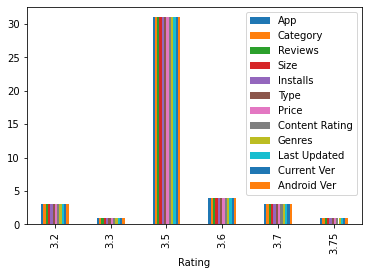

In [103]:
df1.groupby([df1['Rating']]).count().plot(kind='bar')

<AxesSubplot:xlabel='Type'>

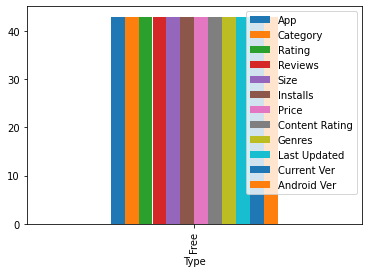

In [104]:
df1.groupby([df1['Type']]).count().plot(kind='bar')

In [105]:
# Data

In [106]:
df2=pd.read_csv("Review.csv")
df2.head(5)

App      Category  Rating  Reviews   Size     Installs  Type  Price  \
0   Telegram     Messaging     3.7       20  70.6M      10,000+  Free      0   
1   WhatsApp     Messaging     3.2       12    19M     500,000+  Free      0   
2  Instagram  Social Media     3.3       12    14M   5,000,000+  Free      0   
3   Facebook  Social Media     3.5       15   8.7M  50,000,000+  Free      0   
4    Twitter  Social Media     3.5       15    25M     100,000+  Free      0   

  Content Rating                                             Genres  \
0       Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
1       Everyone  Messanger; Messaging; Chats; Video Call; Call;...   
2       Everyone                            Business; Social Media;   
3       Everyone                            Business; Social Media;   
4       Everyone        Business; News and Magazines; Social Media;   

   Last Updated Current Ver   Android Ver  
0          2023       1.0.1  4.0.3 and up  
1          2023       1.0.0  4.0.3 and up  
2          2023       2.0.0  4.0.3 and up  
3          2023       1.2.4  4.0.3 and up  
4          2023       2.2.4  4.0.3 and up

In [107]:
df2.columns=df2.columns.str.replace(' ','')

In [108]:
a=df2.Type.unique()
len(a)

1

In [109]:
df2.Type.value_counts(dropna=False)

Free    43
Name: Type, dtype: int64

In [110]:
df2.groupby('Type')['Rating'].value_counts().sort_values(ascending=False)

Type  Rating
Free  3.50      31
      3.60       4
      3.20       3
      3.70       3
      3.30       1
      3.75       1
Name: Rating, dtype: int64

In [111]:
df2.shape

(43, 13)

In [112]:
df2.Genres.value_counts(dropna=False)

Business; Social Media;                                       4
Travel and Navigation; Tourism;                               3
Entertainment; Movies;                                        3
Entertainment; Songs;                                         3
E-commerce; Shopping; Delivery;                               3
Education; Courses; Students;                                 3
News and Magazines; Daily News;                               3
Money; Transcation; QR;                                       3
Game; Run;                                                    2
E-commerce; Food Delivery;                                    2
Messanger; Messaging; Chats; Video Call; Call; Audio Call;    2
Health and Fitness; Action;                                   2
Travel and Navigation; Season;                                1
Travel and Navigation;                                        1
Health and Fitness; Action; Health;                           1
Health and Fitness; Action; Food; Health

In [113]:
df2=df2.drop_duplicates(subset=None, keep='first', inplace=False)

In [114]:
df2[df2.Rating>4]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, ContentRating, Genres, LastUpdated, CurrentVer, AndroidVer]
Index: []

In [115]:
df2=df2.drop(400)
df2[df2.Rating<5]   

KeyError: '[400] not found in axis'

In [116]:
df2['Installs2']=df2['Installs']
df2['Installs2']=df2.Installs2.apply(lambda x: x.replace('+',''))
df2['Installs2']=df2.Installs2.apply(lambda x: x.replace(',',''))
df2['Installs2']=(df2['Installs2']).astype(int)

In [118]:
df2['Size'] = df2.Size.apply(lambda x: x.replace('M', ''))

In [119]:
print(df2.isnull().sum())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [120]:
df2=df2[~df2['Size'].str.contains("Varies with device")]
df2[df2['Size'].str.contains("Varies with device")]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, ContentRating, Genres, LastUpdated, CurrentVer, AndroidVer, Installs2]
Index: []

In [121]:
df2['Size'] = pd.to_numeric(df2['Size'], errors='coerce')
print(df2.Size)

0     70.6
1     19.0
2     14.0
3      8.7
4     25.0
5      2.8
6      5.6
7     19.0
8     29.0
9     33.0
10     3.1
11    28.0
12    12.0
13    20.0
14    21.0
15    37.0
16     2.7
17     5.5
18    17.0
19    39.0
20    31.0
21    14.0
22    12.0
23     4.2
24     7.0
25    23.0
26     6.0
27    25.0
28     6.1
29     4.6
30     4.2
31     9.2
32     5.2
33    11.0
34    11.0
35     4.2
36     9.2
37    24.0
39    11.0
40     9.4
41    15.0
42    10.0
Name: Size, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\2600207047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Size'] = pd.to_numeric(df2['Size'], errors='coerce')


In [122]:
df2 = df2[~df2['Size'].isin(['Nan'])]
print(df2.isnull().sum())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [123]:
print (df2[ pd.to_numeric(df2['Size'], errors='coerce').isnull()].count())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [124]:
df2['Rating'].fillna(df2['Rating'].mean(), inplace=True)
#fill missing values of Size with mean column values
df2['Size'].fillna(df2['Size'].mean(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [125]:
df2['Installs']=df2.Installs.apply(lambda x: x.replace('+',''))
df2['Installs']=df2.Installs.apply(lambda x: x.replace(',',''))
df2['Installs']=(df2['Installs']).astype(int)
df2.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [126]:
df2['Installs']=np.log(df2.Installs)

In [127]:
print (df2[ pd.to_numeric(df2['Size'], errors='coerce').isnull()].count())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [128]:
df2['Size'] = pd.to_numeric(df2['Size'], errors='coerce')

In [129]:
df2['Reviews']=(df2['Reviews']).astype(int)
df2.Reviews=((df2.Reviews)/100)
df2.Reviews

0     0.20
1     0.12
2     0.12
3     0.15
4     0.15
5     0.15
6     0.15
7     0.12
8     0.15
9     0.15
10    0.15
11    0.15
12    0.15
13    0.15
14    0.15
15    0.15
16    0.15
17    0.15
18    0.12
19    0.12
20    0.15
21    0.15
22    0.15
23    0.15
24    0.15
25    0.15
26    0.15
27    0.15
28    0.15
29    0.15
30    0.15
31    0.15
32    0.15
33    0.15
34    0.15
35    0.15
36    0.15
37    0.15
39    0.15
40    0.15
41    0.02
42    0.02
Name: Reviews, dtype: float64

In [138]:
dbb=df2[df2.Rating>1].groupby('Category')['Size'].mean().reset_index()
dbb

Category       Size
0             E-commerce  10.766667
1              Education   6.000000
2          Entertainment  20.585714
3    Finance and Banking  11.400000
4                 Gaming  11.350000
5     Health and Fitness  16.550000
6              Messaging  44.800000
7   News and Information  12.366667
8           Social Media  11.220000
9  Travel and Navigation  22.600000

Text(0.5, 1.0, 'Number of Apps per genre')

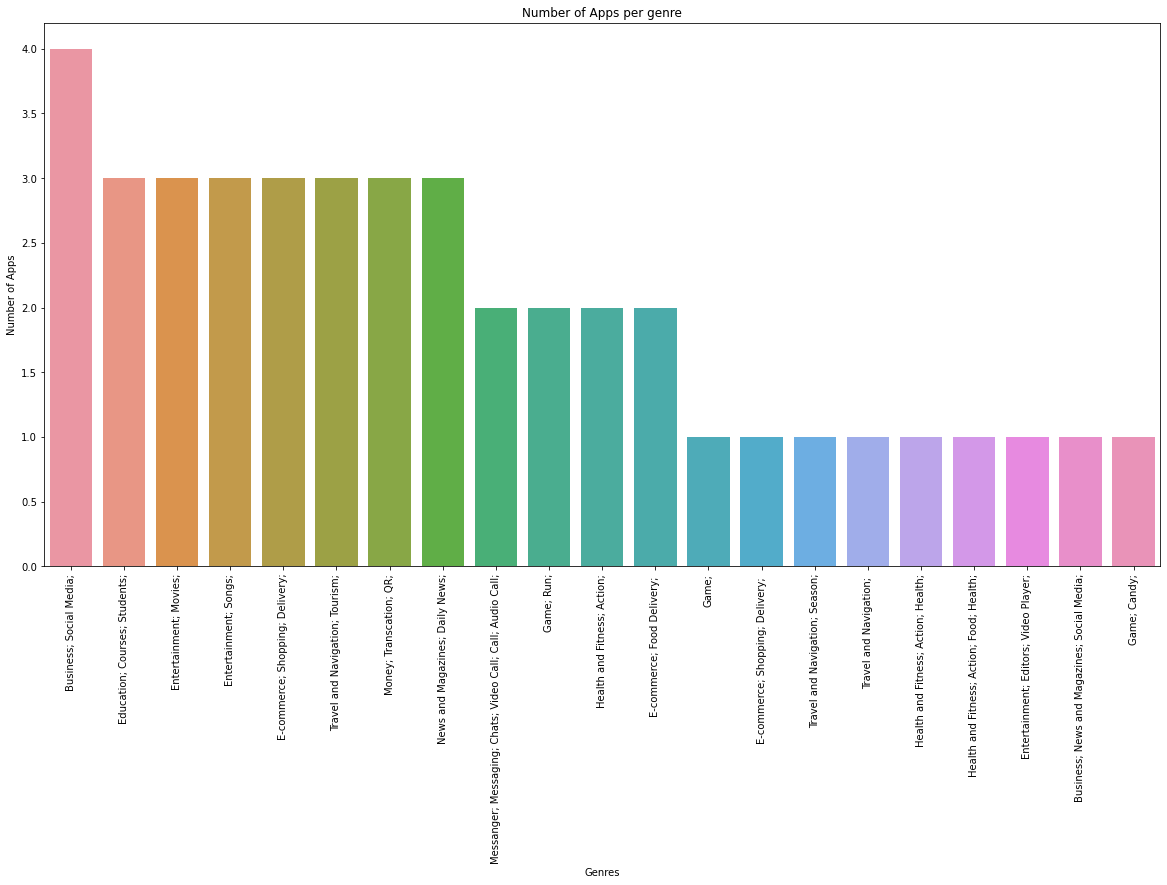

In [139]:
genre= df2['Genres'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=genre.index,y=genre.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.xlabel('Genres')
plt.title("Number of Apps per genre")

Max:  Category
Travel and Navigation    13.538252
Name: Installs, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'E-commerce'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Finance and Banking'),
  Text(4, 0, 'Gaming'),
  Text(5, 0, 'Health and Fitness'),
  Text(6, 0, 'Messaging'),
  Text(7, 0, 'News and Information'),
  Text(8, 0, 'Social Media'),
  Text(9, 0, 'Travel and Navigation')])

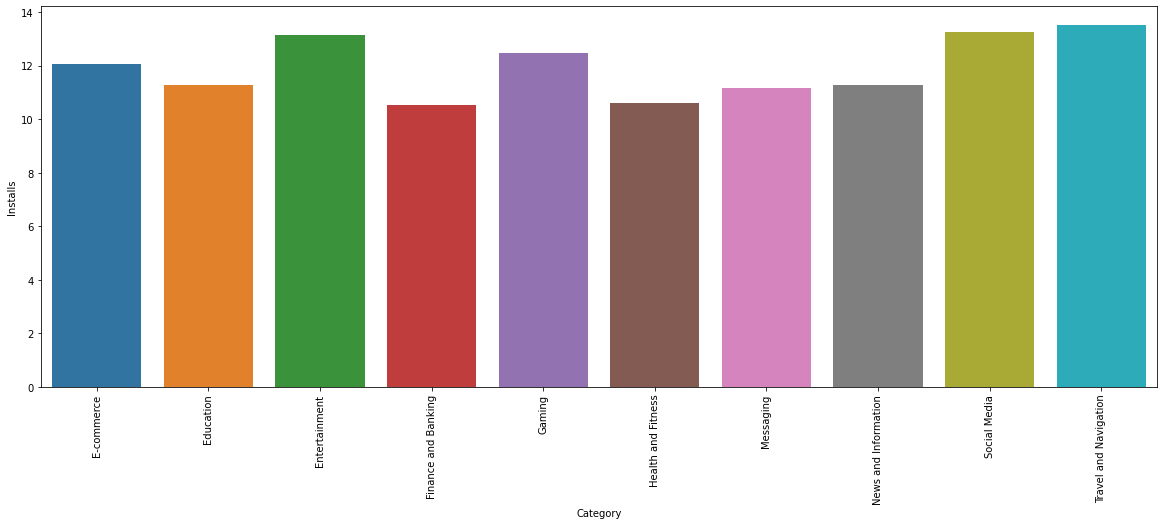

In [141]:
d2=df2[df2.Rating>1].groupby('Category')['Installs'].mean()
print("Max: ", d2[d2==d2.max()])
# a1=d2.plot(kind='bar',rot=90)
# a1.set_ylabel("Reviews")
plt.figure(figsize=(20,7))
ax = sns.barplot(x=d2.index, y=d2.values)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=90)

In [143]:
d4=df2.groupby('Category')['Rating'].mean()

In [144]:
d4[d4==d4.max()]

Category
Travel and Navigation    3.56
Name: Rating, dtype: float64

(1.0, 3.5)

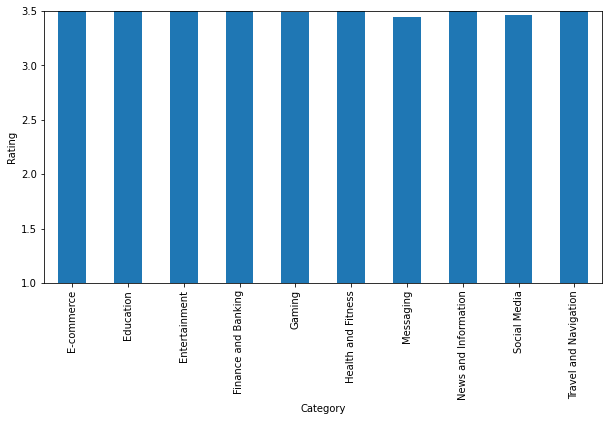

In [149]:
a = d4.plot.bar(x='Category', y='Rating', rot=90, figsize=(10,5))
a.set_ylabel("Rating")
a.set_ylim(1,3.5)

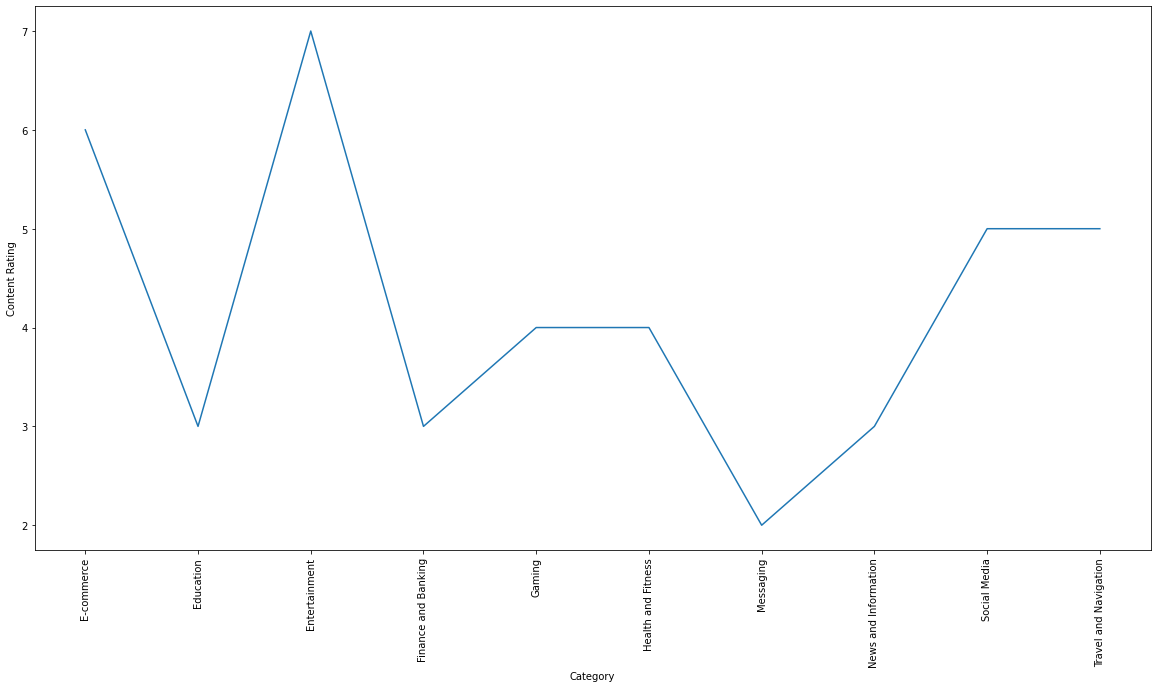

In [150]:
df5=df2.groupby('Category')['ContentRating'].count()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Content Rating")
sns.lineplot(x=df5.index , y =df5.values, palette="Set1")
plt.show()

In [155]:
d7=df2.groupby('ContentRating')['Rating'].mean()
d7[d7==d7.max()]

ContentRating
Everyone    3.503571
Name: Rating, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\3064633039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f',ax=ax)


<AxesSubplot:>

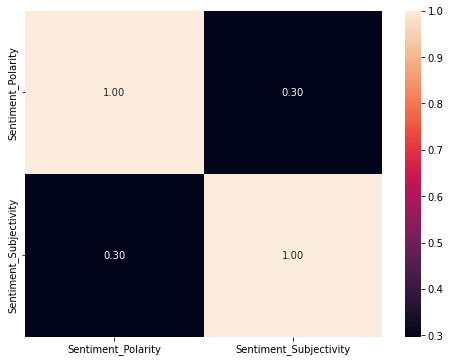

In [159]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr(), annot=True, fmt='.2f',ax=ax)

In [162]:
df2.App = df2.App.astype('category')
df2.Genres = df2.Genres.astype('category')
df2.Reviews = df2.Reviews.astype('category')

In [182]:
App_genre1 = df2.loc[(df2.Genres == 'Business') | (df2.Genres == 'Social Media') | \
                       (df2.Genres == 'Health and Fitness') | (df2.Genres == 'Action') | \
                       (df2.Genres == 'Travel and Navigation') | (df2.Genres == 'Tourism')]

In [183]:
App_genre2 = df2.loc[(df2.Genres == 'Money') | (df2.Genres == 'Transcation') | \
                       (df2.Genres == 'News and Magazines') | (df2.Genres == 'Daily News') | \
                       (df2.Genres == 'Education') | (df2.Genres == 'Courses')]

In [184]:
App_genre3 = df2.loc[(df2.Genres == 'Business') | (df2.Genres == 'E-commerce') | \
                       (df2.Genres == 'Shopping') | (df2.Genres == 'Food') | \
                       (df2.Genres == 'Game') | (df2.Genres == 'Delivery')]

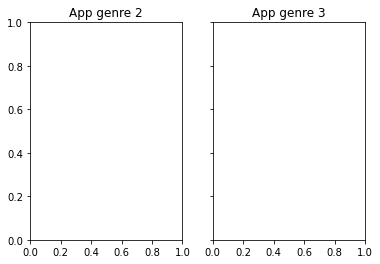

In [187]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
sns.scatterplot(x="Installs", y="Reviews", hue="Genres", data=App_genre2, ax=axes[0])
axes[0].set_title('App genre 2')
sns.scatterplot(x="Installs", y="Reviews", hue="Genres", data=App_genre3, ax=axes[1])
axes[1].set_title('App genre 3')
plt.show()

In [173]:
min_rating=df2['Rating'].idxmin()
print('The App with the least rating is',df2.at[min_rating,'App'],\
      "and its rating is",df2['Rating'].min(),'.')

The App with the least rating is Telegram and its rating is 3.2 .


In [174]:
max_rating=df2['Rating'].idxmax()
print('The App with the highest rating is',df2.at[max_rating,'App'],\
      "and its rating is",df2['Rating'].max(),'.')

The App with the highest rating is Instagram and its rating is 3.75 .


In [175]:
max_install=df2['Installs'].idxmax()
print('The App with the highest Installs in play store is',df2.at[max_install,'App'],'.')

The App with the highest Installs in play store is Telegram .


In [176]:
min_install=df2['Installs'].idxmin()
print('The App with the least no of Install in play store is',df2.at[min_install,'App'],'.')

The App with the least no of Install in play store is Telegram .


In [177]:
min_Size=df2['Size'].idxmin()
print('The App with the least consumption of Memory in play store is',df2.at[min_Size,'App'],\
      "and its Size is",df2['Size'].min(),'.')

The App with the least consumption of Memory in play store is Telegram and its Size is 2.7 .


In [178]:
max_Size=df2['Size'].idxmax()
print('The App with the highest consumption of Memory in play store is',df2.at[max_Size,'App'],\
      "and its Size is",df2['Size'].max(),'.')

The App with the highest consumption of Memory in play store is Telegram and its Size is 70.6 .


AttributeError: 'ImageDraw' object has no attribute 'textsize'

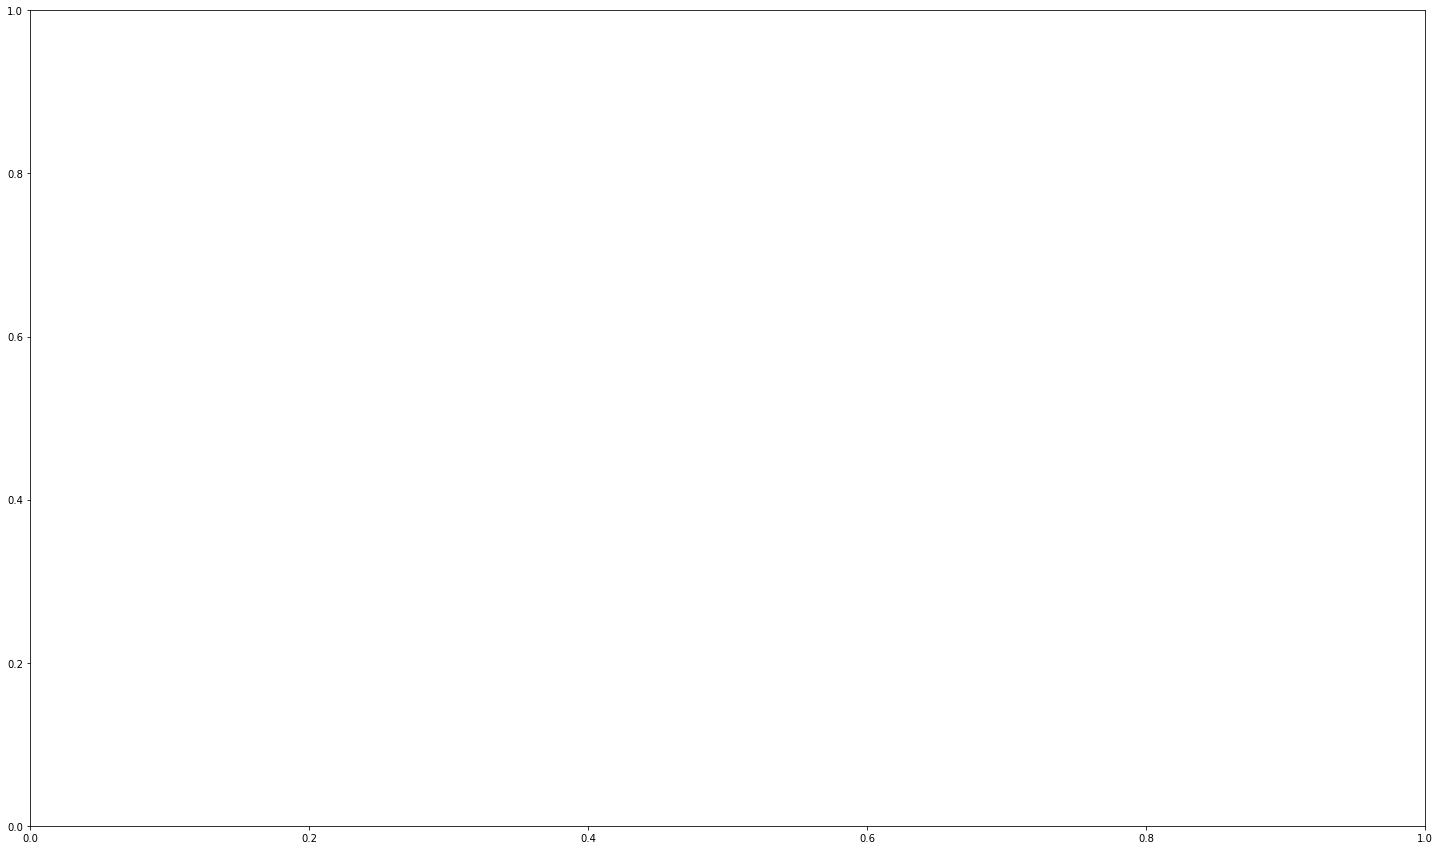

In [181]:
df_ins_asc=df2.sort_values(by=['Size'],axis=0,ascending=False,inplace=False)
from wordcloud import WordCloud 
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=920,
                          height=180
                         ).generate(" ".join(df_ins_asc.head(20)['App']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()